<a href="https://colab.research.google.com/github/AngelTroncoso/s-20-10-data/blob/main/Perfil_Molecular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=f5680ad6c89f5796351f7e5eeb246cee51d8ddf3a0eae97fe51e1b9229e4274f
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [5]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, kruskal
from lifelines import KaplanMeierFitter

# Cargar el dataframe (reemplaza 'archivo.csv' por tu archivo real)
df = pd.read_excel('/content/nuevo (1).xlsx')

# Verificar datos
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EXPEDIENTE                        281 non-null    int64  
 1   NOMBRE                            281 non-null    object 
 2   EDAD                              281 non-null    int64  
 3   SEXO                              281 non-null    object 
 4   TUMOR PRIMARIO                    281 non-null    object 
 5   SUBTIPO HISTOLOGICO               281 non-null    object 
 6   PERFIL MOLECULAR                  281 non-null    object 
 7   AÑO                               281 non-null    int64  
 8    No. METS                         281 non-null    object 
 9   TAMAÑO                            280 non-null    float64
 10  LOCALIZACIÓN                      281 non-null    object 
 11  CIRUGIA PREVIA                    281 non-null    object 
 12  SRS     

#1.Distribución de Perfiles Moleculares

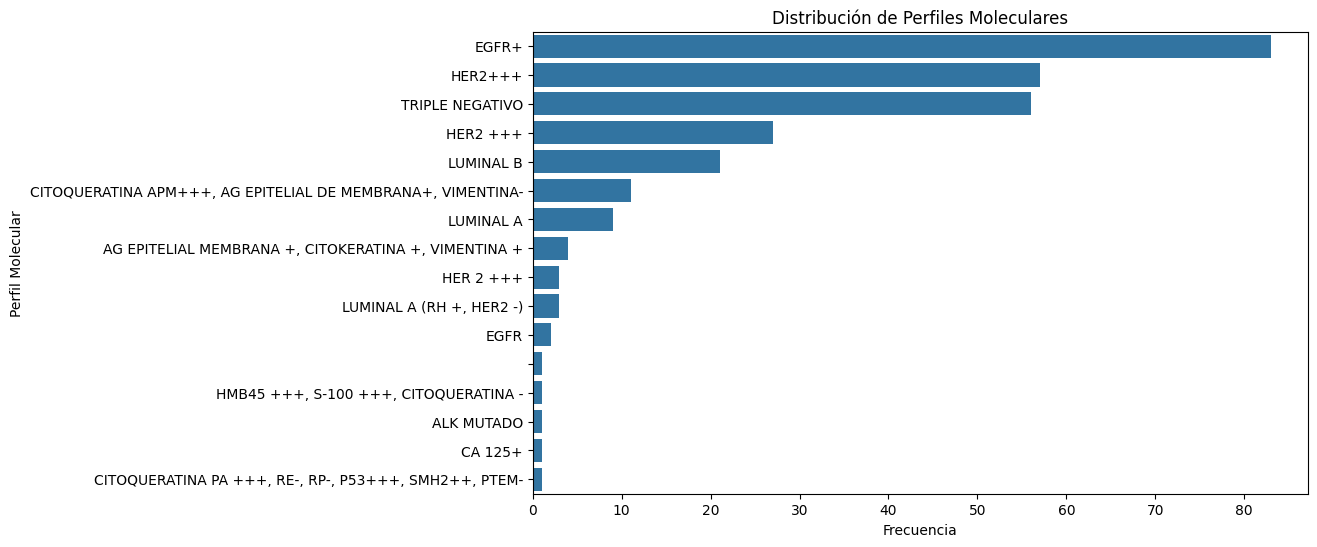

In [7]:
# Gráfico de barras horizontal para la frecuencia de perfiles moleculares
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='PERFIL MOLECULAR',
    order=df['PERFIL MOLECULAR'].value_counts().index
)
plt.title('Distribución de Perfiles Moleculares')
plt.xlabel('Frecuencia')
plt.ylabel('Perfil Molecular')
plt.show()



#2. Relación entre perfil molecular y subtipos histológicos

SUBTIPO HISTOLOGICO                                 ADENOCARCINOMA  \
PERFIL MOLECULAR                                                     
                                                                 0   
AG EPITELIAL MEMBRANA +, CITOKERATINA +, VIMENT...               0   
ALK MUTADO                                                       0   
CA 125+                                                          0   
CITOQUERATINA APM+++, AG EPITELIAL DE MEMBRANA+...               0   
CITOQUERATINA PA +++, RE-, RP-, P53+++, SMH2++,...               1   
EGFR                                                             0   
EGFR+                                                            0   
HER 2 +++                                                        0   
HER2 +++                                                         0   
HER2+++                                                          0   
HMB45 +++, S-100 +++, CITOQUERATINA -                            0   
LUMINAL A           

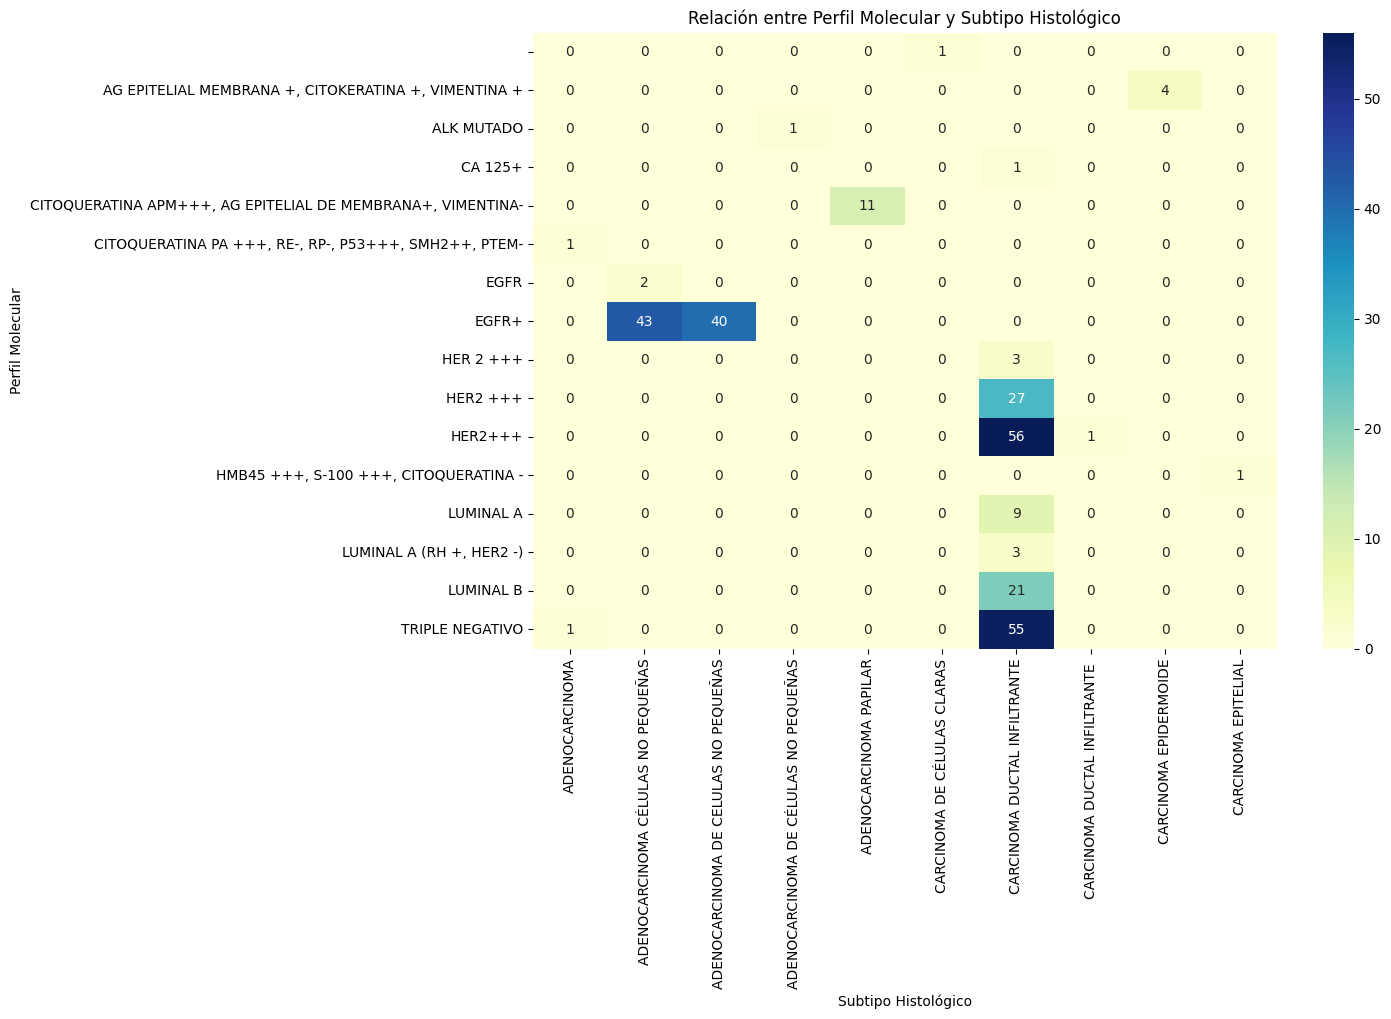

In [9]:
# Tabla cruzada
tabla_cruzada = pd.crosstab(df['PERFIL MOLECULAR'], df['SUBTIPO HISTOLOGICO'])
print(tabla_cruzada)

# Prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cruzada)
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

# Gráfico de calor para la tabla cruzada
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_cruzada, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Relación entre Perfil Molecular y Subtipo Histológico')
plt.xlabel('Subtipo Histológico')
plt.ylabel('Perfil Molecular')
plt.show()


#3. Impacto del perfil molecular en la respuesta al tratamiento

In [12]:
print(df.columns)

print(df['RESPUESTA (CRITERIOS RANO)'].unique())

Index(['EXPEDIENTE', 'NOMBRE', 'EDAD', 'SEXO', 'TUMOR PRIMARIO',
       'SUBTIPO HISTOLOGICO', 'PERFIL MOLECULAR', 'AÑO', ' No. METS',
       'TAMAÑO ', 'LOCALIZACIÓN', 'CIRUGIA PREVIA', 'SRS', 'DOSIS', 'TECNICA ',
       'TRATAMIENTO SISTEMICO', 'RESPUESTA (CRITERIOS RANO)',
       '1ER ESTUDIO DE SEGUIMIENTO X MES', 'RC', 'NADIR', 'RADIONECROSIS'],
      dtype='object')
['RESPUESTA COMPLETA ' 'RESPUESTA PARCIAL' 'ESTABLE' 'PROGRESIÓN'
 'RESPUESTA COMPLETA' 'PROGRESION ' 'ESTABLE ' 'PROGRESION']


In [15]:
# Ejemplo de columna con valores inconsistentes
df['RESPUESTA (CRITERIOS RANO)'] = df['RESPUESTA (CRITERIOS RANO)'].str.strip().str.upper()

# Reemplazar valores inconsistentes
df['RESPUESTA (CRITERIOS RANO)'] = df['RESPUESTA (CRITERIOS RANO)'].replace({
    'RESPUESTA COMPLETA ': 'RESPUESTA COMPLETA',
    'RESPUESTA COMPLETA': 'RESPUESTA COMPLETA',
    'RESPUESTA PARCIAL': 'RESPUESTA PARCIAL',
    'ESTABLE ': 'ESTABLE',
    'PROGRESIÓN': 'PROGRESION',
    'PROGRESION ': 'PROGRESION'
})


RESPUESTA (CRITERIOS RANO)                           ESTABLE  PROGRESION  \
PERFIL MOLECULAR                                                           
                                                         NaN         NaN   
AG EPITELIAL MEMBRANA +, CITOKERATINA +, VIMENT...  0.250000         NaN   
ALK MUTADO                                               NaN         NaN   
CA 125+                                                  NaN         NaN   
CITOQUERATINA APM+++, AG EPITELIAL DE MEMBRANA+...       NaN         NaN   
CITOQUERATINA PA +++, RE-, RP-, P53+++, SMH2++,...       NaN         NaN   
EGFR                                                1.000000         NaN   
EGFR+                                               0.228916         NaN   
HER 2 +++                                                NaN    0.666667   
HER2 +++                                            0.629630    0.148148   
HER2+++                                             0.385965    0.035088   
HMB45 +++, S

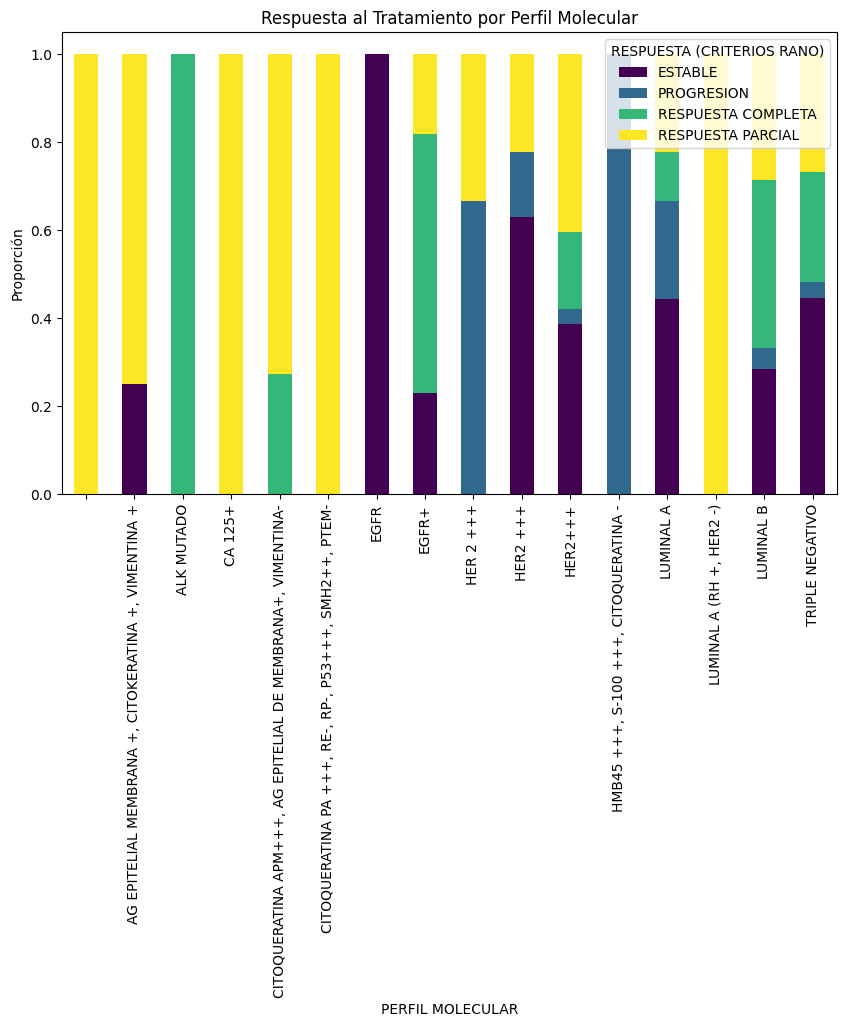

In [16]:
# Tabla de respuestas por perfil molecular
respuesta = df.groupby('PERFIL MOLECULAR')['RESPUESTA (CRITERIOS RANO)'].value_counts(normalize=True).unstack()
print(respuesta)

# Gráfico de barras apilado
respuesta.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Respuesta al Tratamiento por Perfil Molecular')
plt.ylabel('Proporción')
plt.show()


#4. Supervivencia libre de progresión o seguimiento

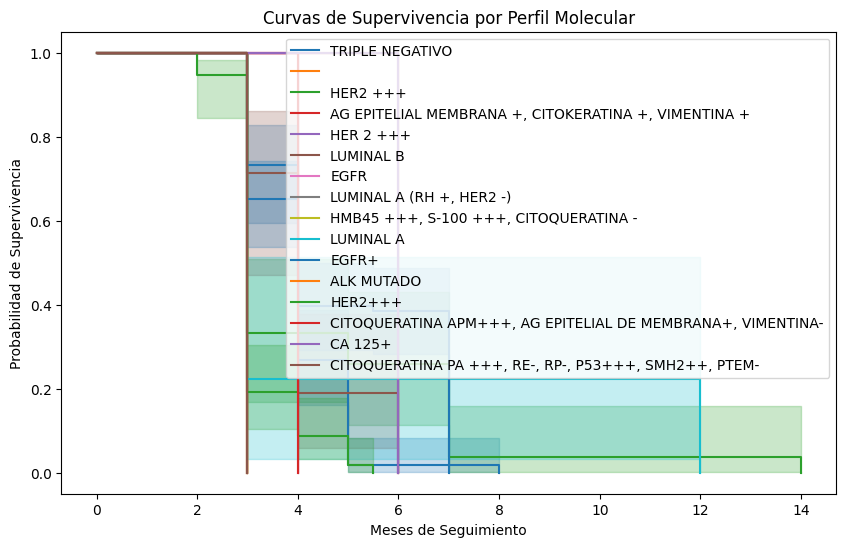

In [17]:
# Curvas de supervivencia (Kaplan-Meier)
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for perfil in df['PERFIL MOLECULAR'].unique():
    datos_perfil = df[df['PERFIL MOLECULAR'] == perfil]
    kmf.fit(datos_perfil['1ER ESTUDIO DE SEGUIMIENTO X MES'], label=perfil)
    kmf.plot_survival_function()

plt.title('Curvas de Supervivencia por Perfil Molecular')
plt.xlabel('Meses de Seguimiento')
plt.ylabel('Probabilidad de Supervivencia')
plt.show()


#5. Relación entre perfil molecular y tamaño del tumor

Kruskal-Wallis Test: Estadístico=76.84728392367569, p-valor=2.621151513290187e-10


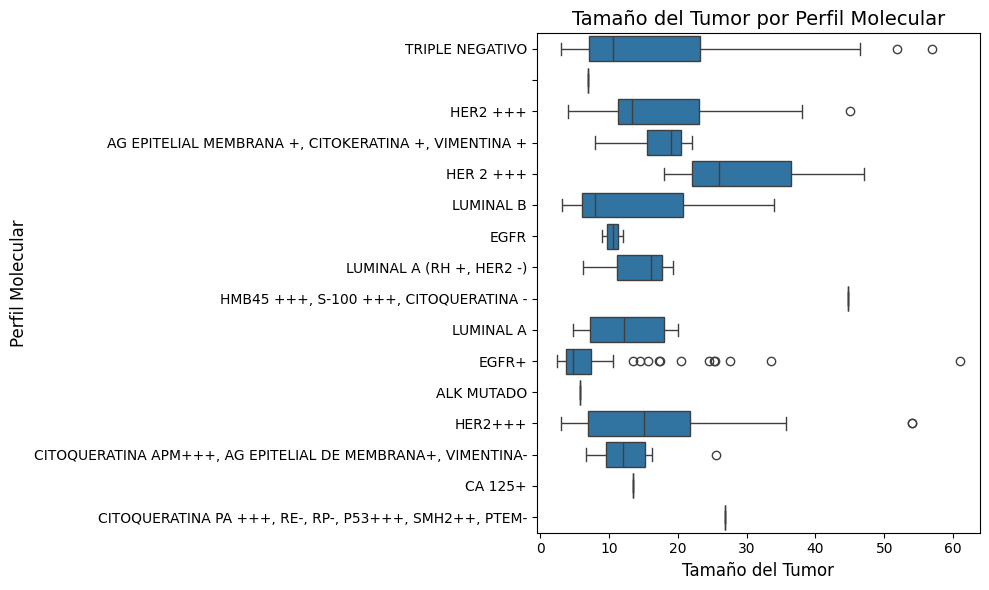

In [33]:
# Prueba no paramétrica Kruskal-Wallis
# Asumiendo que 'Tamaño' es el nombre real de la columna en tu DataFrame:
tamanos = [df[df['PERFIL MOLECULAR'] == perfil]['TAMAÑO '].dropna() for perfil in df['PERFIL MOLECULAR'].unique()]
stat, p = kruskal(*tamanos)
print(f"Kruskal-Wallis Test: Estadístico={stat}, p-valor={p}")

# Boxplot horizontal para mejorar la visibilidad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PERFIL MOLECULAR', x='TAMAÑO ')
plt.title('Tamaño del Tumor por Perfil Molecular', fontsize=14)  # Título con tamaño más pequeño
plt.ylabel('Perfil Molecular', fontsize=12)  # Etiqueta del eje Y
plt.xlabel('Tamaño del Tumor', fontsize=12)  # Etiqueta del eje X
plt.xticks(fontsize=10)  # Etiquetas del eje X
plt.yticks(fontsize=10)  # Etiquetas del eje Y
plt.tight_layout()  # Ajusta los márgenes del gráfico
plt.show()


#6. Relación entre perfil molecular y metástasis

<ipython-input-39-5561ed8a511e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, y='PERFIL MOLECULAR', x=' No. METS', palette='Set2')  # Cambiar orientación


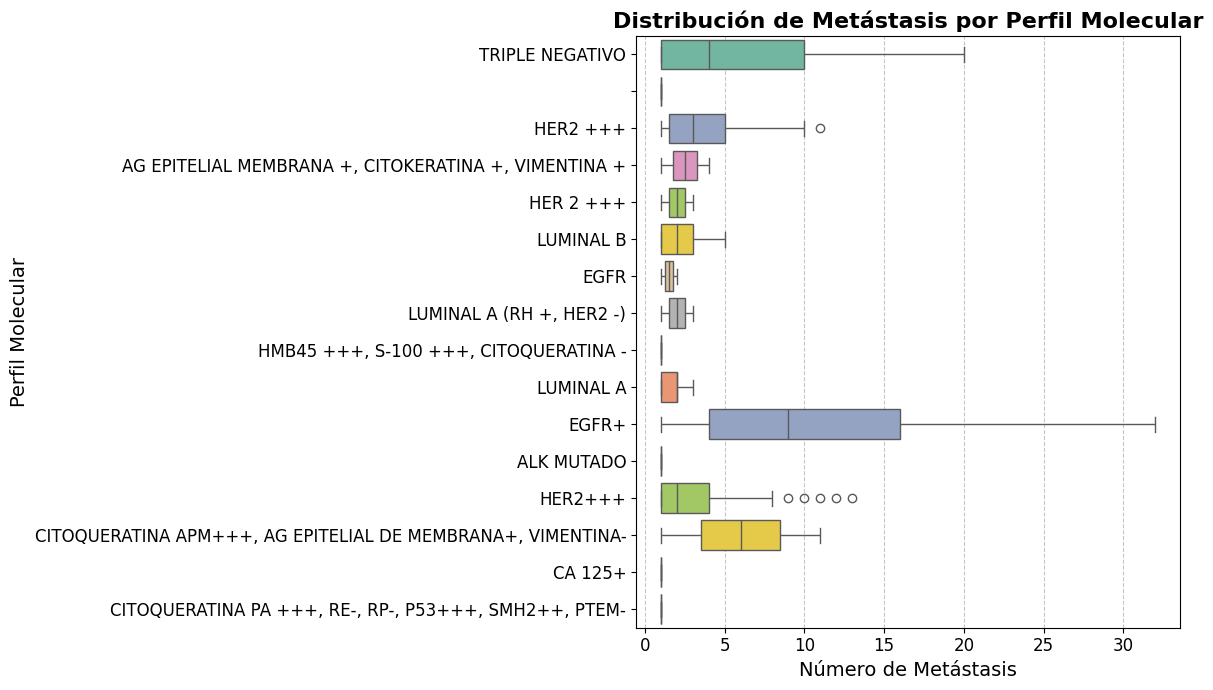

In [39]:
# Limpiar la columna ' No. METS' para asegurar que sea numérica
df[' No. METS'] = pd.to_numeric(df[' No. METS'], errors='coerce')  # Convierte no numéricos a NaN

# Eliminar filas con valores NaN en ' No. METS'
df_limpio = df.dropna(subset=[' No. METS'])

# Crear el gráfico de distribución de metástasis por perfil molecular (horizontal)
plt.figure(figsize=(12, 7))  # Tamaño ajustado
sns.boxplot(data=df_limpio, y='PERFIL MOLECULAR', x=' No. METS', palette='Set2')  # Cambiar orientación
plt.title('Distribución de Metástasis por Perfil Molecular', fontsize=16, fontweight='bold')  # Título mejorado
plt.ylabel('Perfil Molecular', fontsize=14)  # Etiqueta del eje Y
plt.xlabel('Número de Metástasis', fontsize=14)  # Etiqueta del eje X
plt.xticks(fontsize=12)  # Ajustar etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustar etiquetas del eje Y
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadir líneas de referencia en el eje X
plt.tight_layout()


#7. Análisis avanzado: clustering molecular

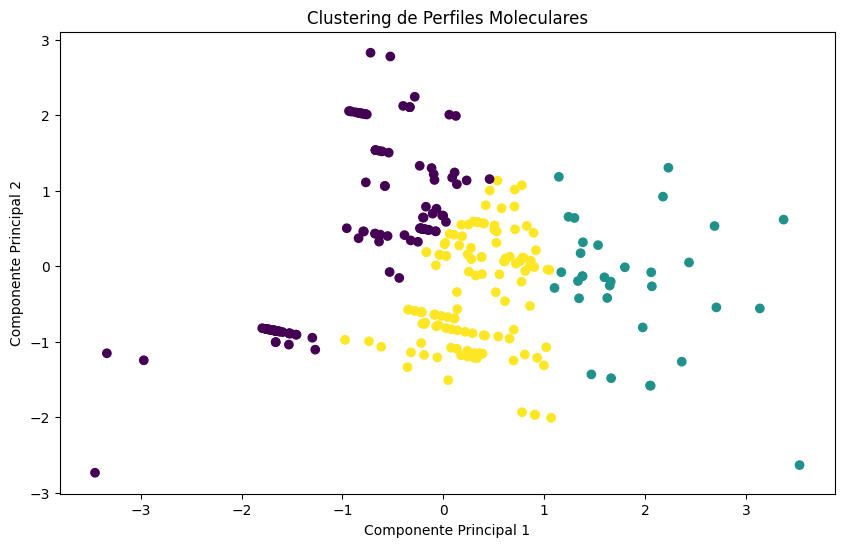

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleccionar columnas numéricas relevantes
numericas = ['EDAD', 'TAMAÑO ', '1ER ESTUDIO DE SEGUIMIENTO X MES']
datos = df[numericas].dropna()

# Escalamiento
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

# PCA para reducción de dimensiones
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_escalados)

# Clustering con K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(datos_pca)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering de Perfiles Moleculares')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


#8. Evaluación de tratamientos sistémicos según perfil molecular

TRATAMIENTO SISTEMICO                               AFATINIB  ALEKTINIB  \
PERFIL MOLECULAR                                                          
                                                           0          0   
AG EPITELIAL MEMBRANA +, CITOKERATINA +, VIMENT...         0          0   
ALK MUTADO                                                 0          1   
CA 125+                                                    0          0   
CITOQUERATINA APM+++, AG EPITELIAL DE MEMBRANA+...         0          0   
CITOQUERATINA PA +++, RE-, RP-, P53+++, SMH2++,...         0          0   
EGFR                                                       0          0   
EGFR+                                                      1          0   
HER 2 +++                                                  0          0   
HER2 +++                                                   0          0   
HER2+++                                                    0          0   
LUMINAL A                

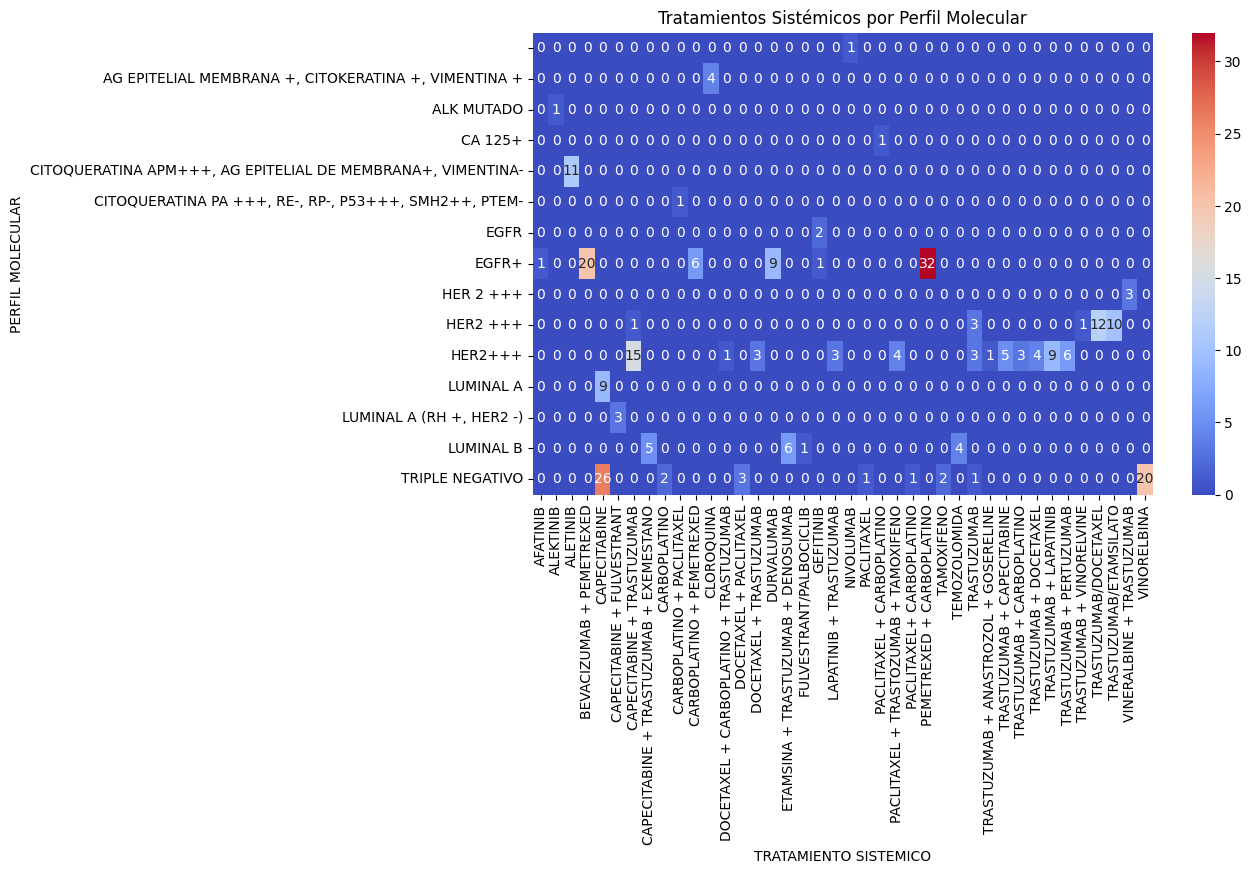

In [43]:
# Tabla cruzada entre perfil molecular y tratamiento sistémico
tratamientos = pd.crosstab(df['PERFIL MOLECULAR'], df['TRATAMIENTO SISTEMICO'])
print(tratamientos)

# Gráfico de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tratamientos, annot=True, cmap='coolwarm', fmt='d')
plt.title('Tratamientos Sistémicos por Perfil Molecular')
plt.show()


#9. Relación con radionecrosis

In [48]:
# Crear un diccionario de mapeo para unificar nombres
mapeo_nombres = {
    'ASINTOMATICA': 'ASINTOMÁTICA',
    'ASINTOMATICO': 'ASINTOMÁTICA',
    'SINTOMATICA': 'SINTOMÁTICA',
    'SINTOMATICO': 'SINTOMÁTICA',
    '-': 'DESCONOCIDO'  # Puedes decidir qué hacer con este caso
}

# Aplicar el mapeo a la columna correspondiente
df['RADIONECROSIS'] = df['RADIONECROSIS'].str.upper().map(mapeo_nombres).fillna(df['RADIONECROSIS'].str.upper())

# Verificar el resultado
print(df['RADIONECROSIS'].value_counts())


RADIONECROSIS
ASINTOMÁTICA    154
SINTOMÁTICA     121
DESCONOCIDO       6
Name: count, dtype: int64


RADIONECROSIS                                       ASINTOMÁTICA  DESCONOCIDO  \
PERFIL MOLECULAR                                                                
                                                        1.000000          NaN   
AG EPITELIAL MEMBRANA +, CITOKERATINA +, VIMENT...      1.000000          NaN   
ALK MUTADO                                                   NaN     1.000000   
CA 125+                                                      NaN     1.000000   
CITOQUERATINA APM+++, AG EPITELIAL DE MEMBRANA+...      1.000000          NaN   
CITOQUERATINA PA +++, RE-, RP-, P53+++, SMH2++,...           NaN          NaN   
EGFR                                                    1.000000          NaN   
EGFR+                                                   0.831325          NaN   
HER 2 +++                                               1.000000          NaN   
HER2 +++                                                0.518519          NaN   
HER2+++                     

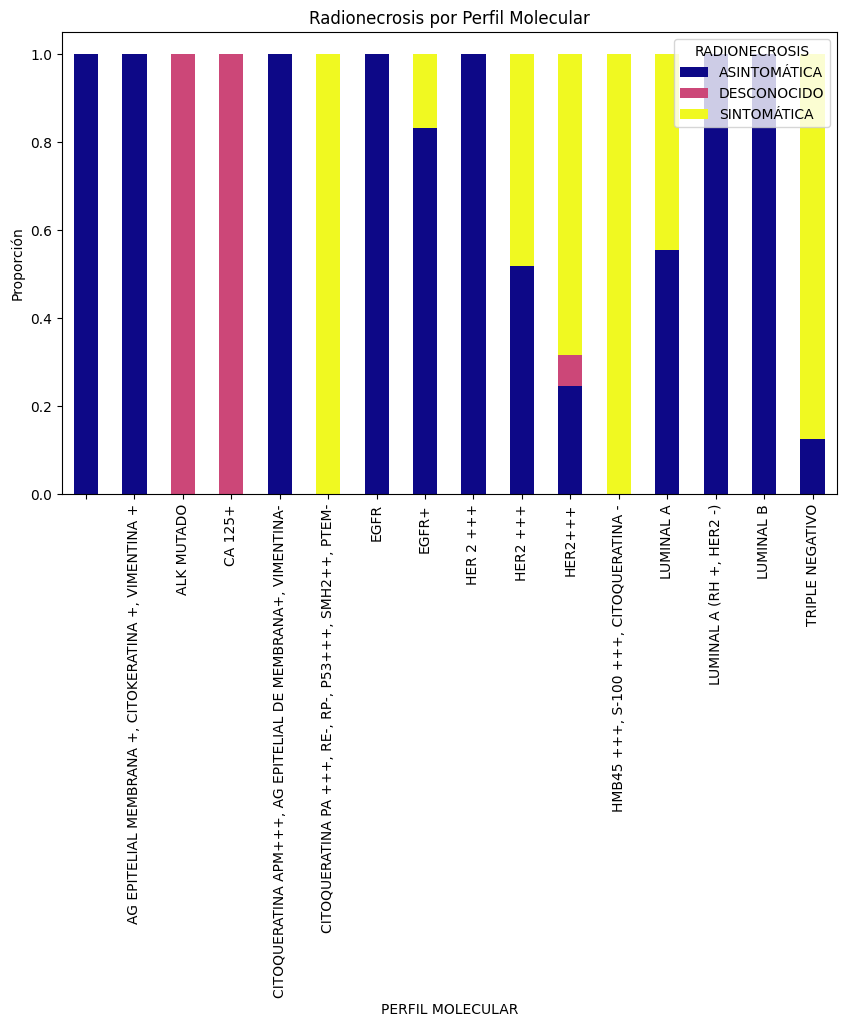

In [49]:
# Frecuencia de radionecrosis por perfil molecular
radionecrosis = df.groupby('PERFIL MOLECULAR')['RADIONECROSIS'].value_counts(normalize=True).unstack()
print(radionecrosis)

# Gráfico de barras apilado
radionecrosis.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Radionecrosis por Perfil Molecular')
plt.ylabel('Proporción')
plt.show()


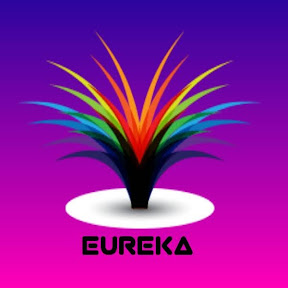